In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import dropbox as db

In [24]:
## Global defintions and settings
color_palette_reds = ['#E74C3C', '#C0392B', '#FAFAFA']

sns.set_style('white')
sns.set_palette(sns.color_palette(color_palette_reds))

# SFV EM 2020 File Import

In [25]:
!ln -s /Users/matthiashugli/Virtualenvs/youth-base/youth-base/config.py config.py
from config import dbx_token
dbx = db.Dropbox(dbx_token)

filename = '/Users/matthiashugli/Dropbox/bucket/euro2020/raw-analyse-sfv.csv'

df = pd.DataFrame()
file = pd.read_csv(filename, header=3, delimiter=',', low_memory=False)
df = df.append(file)

ln: config.py: File exists


In [26]:
df.drop(df.columns[0], axis=1, inplace=True)
df.loc[len(df.index)] = df.iloc[1]

In [27]:

# Create and Clean Header
## Need to promote header afterwards
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

# 6 standards, 7 standards_no, 12 indirekter_freistoss, 20 nahdistanzzone, 27 should_catch, should_go, should_back, should_stay, 50 technik_falsch
typos = {'standarts': 'standards', 'unnamed:_8': 'standards_no', 'ndirekter_freistoss': 'indirekter_freistoss', 'nahdistanzzpone': 'nahdistanzzone', 
'wenn_falsch_cgbs': 'should_catch', 'unnamed:_29': 'should_go', 'unnamed:_30': 'should_back', 'unnamed:_31': 'should_stay', 'unnamed:_51': 'technik_falsch', '': '',}

df.rename(columns=typos, inplace=True)
df.drop([0], inplace=True)

In [28]:
# Cleanse goalkeeper names
df['goalkeeper'] = df['th_name'].str.split(' ')
df['goalkeeper'] = [df['goalkeeper'].iloc[x][-1] for x in range(len(df))]

df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Szczesny' if x == 'Szeczesny' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Dubravka' if x == 'Dúbravka' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Simon' if x == 'Simón' else x)
df['goalkeeper'] = df.goalkeeper.apply(lambda x: 'Olsen' if x == 'Everton' else x)

In [29]:
col_event_infos = df.columns[0:6].tolist()
col_standards = df.columns[6:14].tolist()
col_spielsituation = df.columns[14:21].tolist()
col_verhalten = df.columns[21:31].tolist()
col_technik = df.columns[31:51].tolist()
col_tore = df.columns[51:57].tolist()

print(col_spielsituation)


['ball_durch_den_16er', 'hoher_ball', 'pass_in_die_tiefe', 'rückpass_vor_der_grundlinie', 'rote_zone', 'distanzschuss', 'nahdistanzzone']


In [30]:
### Cleansing and Aggregating Standardsituationen
df.standards_no[df[df.columns[6]].isna() & df[df.columns[7]].isna() & df[df.columns[8]].isna() & df[df.columns[9]].isna() & df[df.columns[10]].isna() & df[df.columns[11]].isna() & df[df.columns[12]].isna() & df[df.columns[13]].isna()] = '1'

df.loc[df.standards == '1', 'ist_standard'] = 'ja'
df.loc[df.standards_no == '1', 'ist_standard'] = 'nein'

i = 8
for x in df:
    if i < 14:
        df.loc[df.iloc[:, i] == '1', 'standard_type'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Spielsituationen
i = 14
for x in df:
    if i < 21:
        df.loc[df.iloc[:, i] == '1', 'spielsituation'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Verhalten
df.loc[df.richtig == '1', 'korrektes_verhalten'] = 'ja'
df.loc[df.falsch == '1', 'korrektes_verhalten'] = 'nein'

i = 21
for x in df:
    if i < 25:
        df.loc[df.iloc[:, i] == '1', 'verhalten'] = df.columns[i]
    i += 1


i = 27
for x in df:
    if i < 31:
        df.loc[df.iloc[:, i] == '1', 'ideales_verhalten'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Technik
df.loc[df.technik_korrekt == '1', 'korrekte_technik'] = 'ja'
df.loc[df.technik_falsch == '1', 'korrekte_technik'] = 'nein'

i = 30
for x in df:
    if i < 48:
        df.loc[df.iloc[:, i] == '1', 'technik'] = df.columns[i]
    i += 1

### Cleansing and Aggregating Outcome
i = 51
for x in df:
    if i < 57:
        df.loc[df.iloc[:, i] == '1', 'outcome'] = df.columns[i]
    i += 1




print(df.head(10))

   spielcode            th_name    team  paarung minuten topszene standards  \
1         VR  TUR Ugurcan Cakir  Türkei  Italien    2'09      NaN       NaN   
2         VR  TUR Ugurcan Cakir  Türkei  Italien    3'50      NaN       NaN   
3         VR  TUR Ugurcan Cakir  Türkei  Italien    6'49      NaN       NaN   
4         VR  TUR Ugurcan Cakir  Türkei  Italien   13'26      NaN       NaN   
5         VR  TUR Ugurcan Cakir  Türkei  Italien   14'02      NaN       NaN   
6         VR  TUR Ugurcan Cakir  Türkei  Italien   18'43      NaN       NaN   
7         VR  TUR Ugurcan Cakir  Türkei  Italien   19'08      NaN       NaN   
8         VR  TUR Ugurcan Cakir  Türkei  Italien   20'12      NaN       NaN   
9         VR  TUR Ugurcan Cakir  Türkei  Italien   21'38        T         1   
10        VR  TUR Ugurcan Cakir  Türkei  Italien   22'02      NaN         1   

   standards_no seitlicher_freistoss eckball  ... goalkeeper ist_standard  \
1             1                  NaN     NaN  ...    

In [31]:
df = df.drop(columns=col_standards)
standard_column = df.pop('ist_standard')
df.insert(6, 'ist_standard', standard_column)

df = df.drop(columns=col_spielsituation)

df = df.drop(columns=col_verhalten)
verhalten_column = df.pop('korrektes_verhalten')
df.insert(7, 'korrektes_verhalten', verhalten_column)

df = df.drop(columns=col_technik)
technik_column = df.pop('korrekte_technik')
df.insert(8, 'korrekte_technik', technik_column)

df = df.drop(columns=col_tore)

In [32]:
print(df.head())

  spielcode            th_name    team  paarung minuten topszene ist_standard  \
1        VR  TUR Ugurcan Cakir  Türkei  Italien    2'09      NaN         nein   
2        VR  TUR Ugurcan Cakir  Türkei  Italien    3'50      NaN         nein   
3        VR  TUR Ugurcan Cakir  Türkei  Italien    6'49      NaN         nein   
4        VR  TUR Ugurcan Cakir  Türkei  Italien   13'26      NaN         nein   
5        VR  TUR Ugurcan Cakir  Türkei  Italien   14'02      NaN         nein   

  korrektes_verhalten korrekte_technik goalkeeper standard_type  \
1                  ja               ja      Cakir           NaN   
2                  ja               ja      Cakir           NaN   
3                  ja               ja      Cakir           NaN   
4                  ja               ja      Cakir           NaN   
5                  ja              NaN      Cakir           NaN   

                spielsituation verhalten ideales_verhalten     technik  \
1  rückpass_vor_der_grundlinie      

# Analyse Spielsituationen

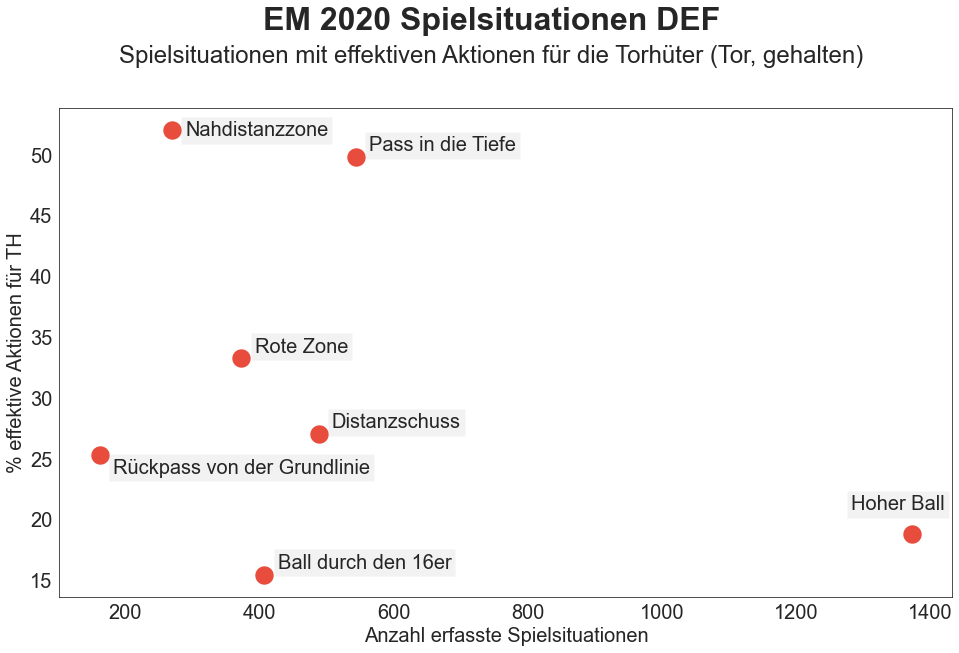

In [33]:
## Create Table with Spielsituationen and GK events 
df['ausführung'] = df.outcome.apply(lambda x: 'ja' if x in ['tor_erhalten', 'kein_tor_gehalten'] else 'nein')
aktionen_spielsituation = df.groupby(['spielsituation', 'ausführung']).spielcode.count().reset_index()
aktionen_spielsituation = aktionen_spielsituation.pivot(index='spielsituation', columns='ausführung', values='spielcode').reset_index()
aktionen_spielsituation['total'] = aktionen_spielsituation.ja + aktionen_spielsituation.nein
aktionen_spielsituation['ausführungen_%'] = aktionen_spielsituation.ja / aktionen_spielsituation.total * 100
aktionen_spielsituation.drop(columns=['ja', 'nein'], inplace=True)

## Create Figure Spielsituationen
fig = plt.figure(figsize=(16,9))

text_spielsituationen = ['Ball durch den 16er', 'Distanzschuss', 'Hoher Ball', 'Nahdistanzzone', 'Pass in die Tiefe', 'Rote Zone', 'Rückpass von der Grundlinie']
label_xpos = [20, 20, -90, 20, 20, 20, 20]
label_ypos = [0.5, 0.5, 2, -0.5, 0.5, 0.5, -1.5]
for i in range(aktionen_spielsituation.shape[0]):
    plt.text(x=aktionen_spielsituation.total[i]+label_xpos[i], 
        y=aktionen_spielsituation['ausführungen_%'][i]+label_ypos[i], 
        s=text_spielsituationen[i], 
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

graph = sns.scatterplot(x='total', y='ausführungen_%', s=400, data=aktionen_spielsituation)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl erfasste Spielsituationen', fontsize=20)
plt.ylabel('% effektive Aktionen für TH', fontsize=20)
#plt.title('Aktionen für TH und Häufigkeit der Spielsituationen', fontsize=24, pad=20)
fig.text(0.5, 1, 'EM 2020 Spielsituationen DEF', ha='center', fontsize=32, fontweight='bold')
fig.text(0.5, 0.95, 'Spielsituationen mit effektiven Aktionen für die Torhüter (Tor, gehalten)', ha='center', fontsize=24)

plt.savefig('em2020_torhüter_aktionen.png')
plt.show()

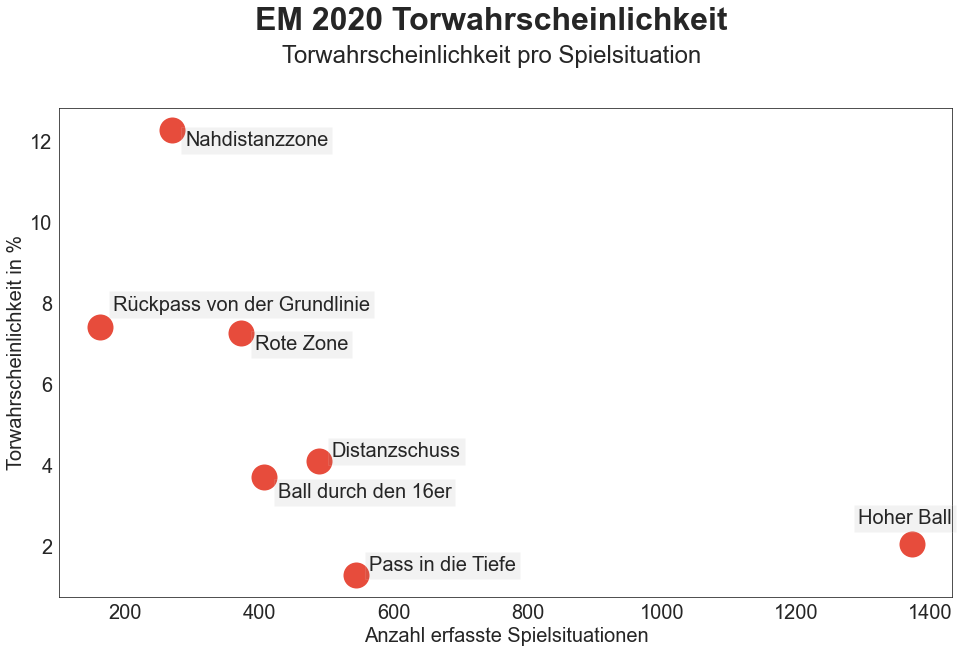

In [34]:
## Create Table with Spielsituationen and GK events
df['ist_tor'] = df.outcome.apply(lambda x: 'ja' if x == 'tor_erhalten' else 'nein')
torgefahr = df.groupby(['spielsituation', 'ist_tor']).spielcode.count().reset_index()
torgefahr = torgefahr.pivot(index='spielsituation', columns='ist_tor', values='spielcode').reset_index()
torgefahr['total'] = torgefahr.ja + torgefahr.nein
torgefahr['tor_%'] = torgefahr.ja / torgefahr.total * 100
torgefahr.drop(columns=['ja', 'nein'], inplace=True)

## Create Figure with Goal Expectations per Spielsituation
fig = plt.figure(figsize=(16,9))

sns.scatterplot(x='total', y='tor_%', s=800, data=torgefahr)

text_spielsituationen = ['Ball durch den 16er', 'Distanzschuss', 'Hoher Ball', 'Nahdistanzzone', 'Pass in die Tiefe', 'Rote Zone', 'Rückpass von der Grundlinie']
label_xpos = [20, 20, -80, 20, 20, 20, 20]
label_ypos = [-0.5, 0.1, 0.5, -0.4, 0.1, -0.4, 0.4]
for i in range(torgefahr.shape[0]):
    plt.text(x=torgefahr.total[i]+label_xpos[i], 
        y=torgefahr['tor_%'][i]+label_ypos[i], 
        s=text_spielsituationen[i], 
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl erfasste Spielsituationen', fontsize=20)
plt.ylabel('Torwahrscheinlichkeit in %', fontsize=20)
fig.text(0.5, 1, 'EM 2020 Torwahrscheinlichkeit', ha='center', fontsize=32, fontweight='bold')
fig.text(0.5, 0.95, 'Torwahrscheinlichkeit pro Spielsituation', ha='center', fontsize=24)

    
plt.show()

# Analyze Nahdistanzzone

<Figure size 1152x648 with 0 Axes>

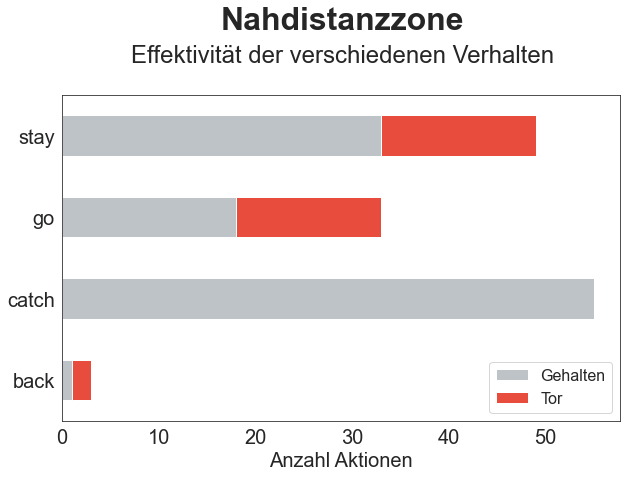

In [35]:
nahdistanz = df[(df.spielsituation == 'nahdistanzzone') & ((df.outcome == 'kein_tor_gehalten') | (df.outcome == 'tor_erhalten'))]
group_ndz = nahdistanz.groupby(['verhalten', 'outcome']).spielcode.count().unstack(fill_value=0).stack().reset_index()
group_ndz.rename(columns={0: 'aktionen'}, inplace=True)
pivot_ndz = group_ndz.pivot(index='verhalten', columns='outcome', values='aktionen').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
#pivot_ndz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_ndz.columns[1:4].tolist()
#pivot_ndz[cols] = pivot_ndz[cols].div(pivot_ndz[cols].sum(axis=1), axis=0)

fig = plt.figure(figsize=(16,9))

pivot_ndz.plot.barh(stacked=True, figsize=(10,6), color=['#BDC3C7','#E74C3C'])

ay = plt.subplot()
legend = ['Gehalten', 'Tor']
ay.legend(legend, loc=4, fontsize=16)
ay.set_yticks(range(len(pivot_ndz)))
ay.set_yticklabels(pivot_ndz['verhalten'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl Aktionen', fontsize=20)
plt.text(29, 4.3, 'Nahdistanzzone', ha='center', fontsize=32, fontweight='bold')
plt.text(29, 3.9, 'Effektivität der verschiedenen Verhalten', ha='center', fontsize=24)


plt.show()

# Analyse Rote Zone
Die Rote Zone zeichnet sich durch eine nahe Distanz zum Tor aus, jedoch erhält der Torhüter die Möglichlkeit auf den Ball zu reagieren. Am häufigsten haben die Torhüter ein Stay, also ein Verschieben in die Winkel angewendet und waren damit bei effektiven Abschlüssen auch erfolgreich. Der Entscheid **Go** war nur zu knapp 50% erfolgreich und scheint kein Erfolgsrezept zu sein.

<Figure size 1152x648 with 0 Axes>

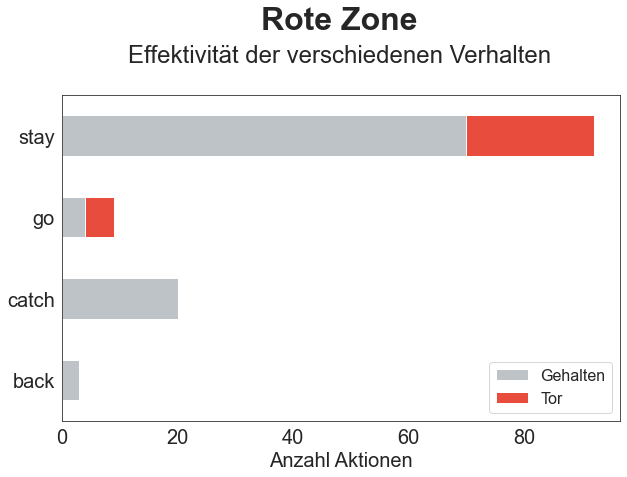

In [36]:
rote_zone = df[df.spielsituation == 'rote_zone']
group_rz = rote_zone.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_rz = group_rz.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
pivot_rz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_rz.columns[1:3].tolist()
#pivot_rz[cols] = pivot_rz[cols].div(pivot_rz[cols].sum(axis=1), axis=0)

fig = plt.figure(figsize=(16,9))

pivot_rz.plot.barh(stacked=True, figsize=(10,6), color=['#BDC3C7','#E74C3C'])
ay = plt.subplot()
legend = ['Gehalten', 'Tor']
ay.legend(legend, loc=4, fontsize=16)
ay.set_yticks(range(len(pivot_ndz)))
ay.set_yticklabels(pivot_rz['verhalten'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Anzahl Aktionen', fontsize=20)
plt.text(48, 4.3, 'Rote Zone', ha='center', fontsize=32, fontweight='bold')
plt.text(48, 3.9, 'Effektivität der verschiedenen Verhalten', ha='center', fontsize=24)

plt.show()

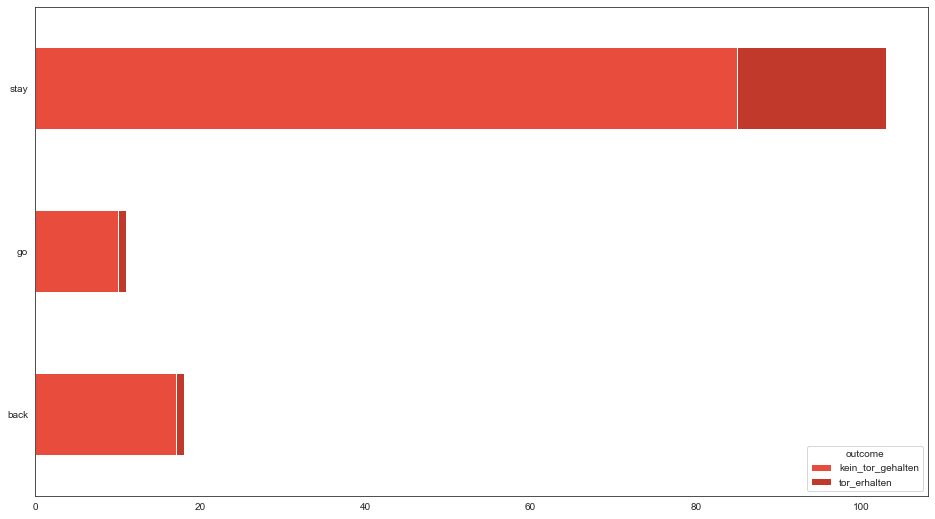

In [37]:
distanzschuss = df[df.spielsituation == 'distanzschuss']
group_distanz = distanzschuss.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_distanz = group_distanz.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
#pivot_ndz_sum = pivot_ndz.sum()
pivot_distanz.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_distanz.columns[1:3].tolist()
#pivot_distanz[cols] = pivot_distanz[cols].div(pivot_distanz[cols].sum(axis=1), axis=0)

pivot_distanz.plot.barh(stacked=True, figsize=(16,9))
ay = plt.subplot()
ay.set_yticks(range(len(pivot_distanz)))
ay.set_yticklabels(pivot_distanz['verhalten'])



plt.show()

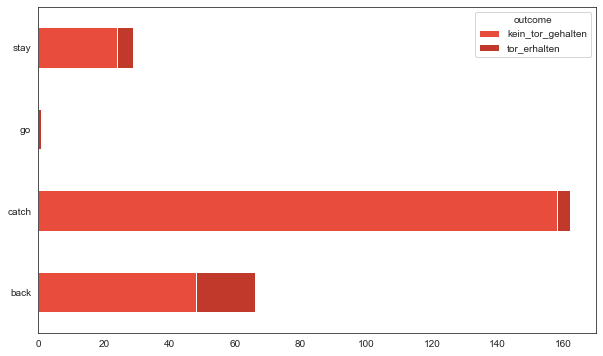

In [38]:
hoher_ball = df[df.spielsituation == 'hoher_ball']
group_hb = hoher_ball.groupby(['verhalten', 'outcome']).spielcode.count().reset_index()
pivot_hb = group_hb.pivot(index='verhalten', columns='outcome', values='spielcode').reset_index()
pivot_hb.drop(columns=['kein_tor_geblockt','keine_aktion', 'verteidiger_klärt', 'kein_tor_daneben'], inplace=True)
cols = pivot_hb.columns[1:3].tolist()
#pivot_hb[cols] = pivot_hb[cols].div(pivot_hb[cols].sum(axis=1), axis=0)

pivot_hb.plot.barh(stacked=True, figsize=(10,6))
ay = plt.subplot()
ay.set_yticks(range(len(pivot_hb)))
ay.set_yticklabels(pivot_hb['verhalten'])

plt.show()

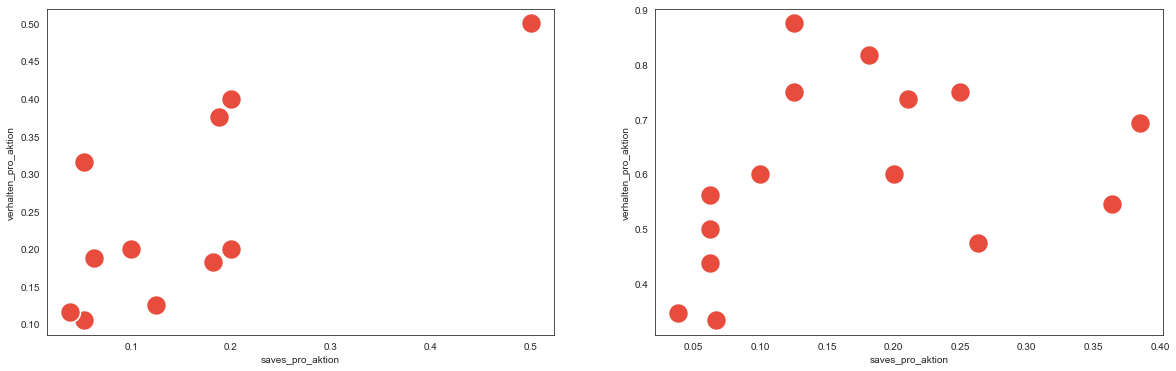

In [67]:
gk_ndz = df[['spielcode', 'goalkeeper', 'spielsituation', 'verhalten', 'outcome', 'ist_tor']]
gk_ndz = gk_ndz[gk_ndz.spielsituation == 'nahdistanzzone']
gk_ndz['outcome'] = gk_ndz.outcome.apply(lambda x: 1 if x == 'kein_tor_gehalten' else 0 if x == 'tor_erhalten' else np.nan)
gk_aktionen = gk_ndz.groupby('goalkeeper').agg({'spielcode': 'count'}).rename(columns={'spielcode': 'aktionen_ndz'}).reset_index()
gk_verhalten = gk_ndz.groupby(['goalkeeper', 'verhalten']).agg({'verhalten': 'count', 'outcome': 'sum'}).rename(columns={'verhalten': 'total_verhalten', 'outcome': 'total_saves'}).reset_index()
group_ndz = pd.merge(gk_verhalten, gk_aktionen)

group_ndz['verhalten_pro_aktion'] = group_ndz.total_verhalten / group_ndz.aktionen_ndz
group_ndz['saves_pro_aktion'] = group_ndz.total_saves / group_ndz.aktionen_ndz
group_ndz.drop(columns=['total_verhalten', 'total_saves', 'aktionen_ndz'], inplace=True)
group_ndz = group_ndz.loc[group_ndz.saves_pro_aktion != 0]

ndz_go = group_ndz[group_ndz.verhalten == 'go'].reset_index()
ndz_stay = group_ndz[group_ndz.verhalten == 'stay'].reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

scatter_go = sns.scatterplot(x='saves_pro_aktion', y='verhalten_pro_aktion', s=400, data=ndz_go, ax=ax[0])
scatter_stay = sns.scatterplot(x='saves_pro_aktion', y='verhalten_pro_aktion', s=400, data=ndz_stay, ax=ax[1])

plt.show()

In [89]:
gk_ndz.head()

,spielcode,goalkeeper,spielsituation,verhalten,outcome,ist_tor
22,VR,Cakir,nahdistanzzone,stay,NaN,nein
27,VR,Cakir,nahdistanzzone,stay,1.0,nein
38,VR,Cakir,nahdistanzzone,stay,0.0,ja
64,VR,Donnarumma,nahdistanzzone,go,NaN,nein
78,VR,Courtois,nahdistanzzone,stay,NaN,nein


IndexError: list index out of range

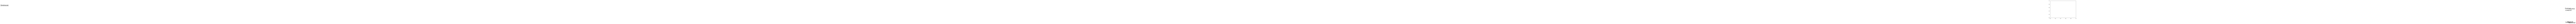

In [68]:
scatter_go = sns.scatterplot(x='saves_pro_aktion', y='verhalten_pro_aktion', s=400, data=ndz_go, ax=ax[0])

label_xpos = [20, 20, -80, 20, 20, 20, 20]
label_ypos = [-0.5, 0.1, 0.5, -0.4, 0.1, -0.4, 0.4]
for i in range(ndz_go.shape[0]):
    plt.text(x=ndz_go.saves_pro_aktion[i]+label_xpos[i], 
        y=ndz_go.verhalten_pro_aktion[i]+label_ypos[i], 
        s=ndz_go.goalkeeper[i], 
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

TypeError: text() missing 1 required positional argument: 's'

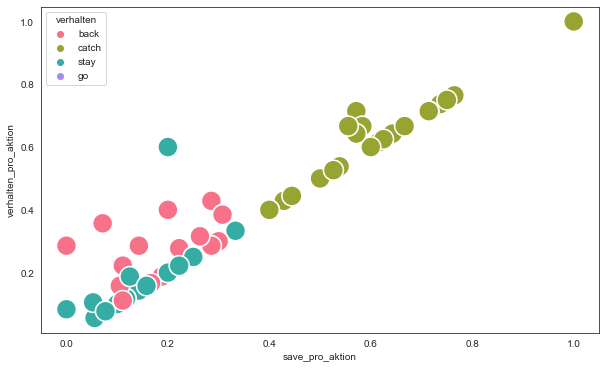

In [ ]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x='save_pro_aktion', y='verhalten_pro_aktion', s=400, data=group_hoherball, hue='verhalten')

for i in range(group_hoherball.shape[0]):
    plt.text(x=group_hoherball.save_pro_aktion[i], 
        y=group_hoherball.verhalten_pro_aktion[i],
        fontsize=20,
        bbox=dict(facecolor='gray', alpha=0.1))

plt.show()

In [43]:
technik_rz = df[['spielcode', 'team', 'spielsituation', 'technik', 'outcome', 'ist_tor']]
technik_rz = technik_rz[(technik_rz.spielsituation == 'rote_zone') & (technik_rz.outcome.isin(['kein_tor_gehalten', 'tor_erhalten']))]

group_technik_rz = technik_rz.groupby(['technik', 'outcome']).spielcode.count().reset_index()
pivot_technik_rz = group_technik_rz.pivot(index='technik', columns='outcome', values='spielcode')
pivot_technik_rz['abgewehrt'] = pivot_technik_rz.kein_tor_gehalten / (pivot_technik_rz.kein_tor_gehalten + pivot_technik_rz.tor_erhalten)
##pivot_technik_rz['abgewehrt'] = pivot_technik_rz['abgewehrt'].apply(lambda x: 1 if x.isna() else x)


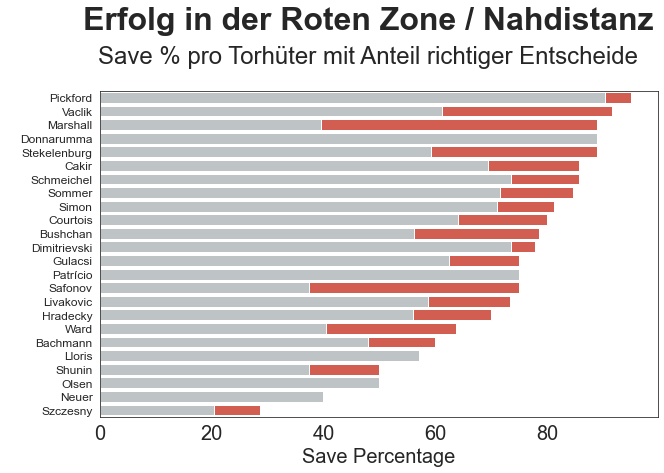

In [91]:
#group_saves = saves.groupby(['goalkeeper', 'outcome', 'technik']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
box = df[((df.spielsituation == 'nahdistanzzone') | (df.spielsituation == 'rote_zone')) & ((df.outcome == 'kein_tor_gehalten') | (df.outcome == 'tor_erhalten'))]
group_saves = box.groupby(['goalkeeper', 'outcome', 'korrektes_verhalten']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
pivot_save_verhalten = group_saves.pivot(index='goalkeeper', columns=['outcome', 'korrektes_verhalten'], values='anzahl_aktionen').reset_index()
pivot_save_verhalten = pivot_save_verhalten.fillna(0)
pivot_save_verhalten['save_perc'] = pivot_save_verhalten.iloc[:, 1:3].sum(axis=1) / pivot_save_verhalten.iloc[:, 1:5].sum(axis=1) * 100
pivot_save_verhalten['korr_verhalten_perc'] = (pivot_save_verhalten.iloc[:, [1, 3]].sum(axis=1) / pivot_save_verhalten.iloc[:, 1:5].sum(axis=1)) * pivot_save_verhalten.save_perc
#pivot_save_verhalten.drop(pivot_save_verhalten.columns[1:5], axis=1, inplace=True)
pivot_save_verhalten = pivot_save_verhalten[pivot_save_verhalten.goalkeeper != 'Dubravka']
#pivot_save_verhalten['save_perc'] = pivot_save_verhalten.kein_tor_gehalten.sum() / (pivot_save_verhalten.kein_tor_gehalten.sum() + pivot_save_verhalten.tor_erhalten.sum())

fig = plt.figure(figsize=(10,6))

s1 = sns.barplot(x='save_perc', y='goalkeeper', data=pivot_save_verhalten, orient='h', color='#E74C3C', order=pivot_save_verhalten.sort_values('save_perc', ascending=False).goalkeeper)
s2 = sns.barplot(x='korr_verhalten_perc', y='goalkeeper', data=pivot_save_verhalten, orient='h', color='#BDC3C7', order=pivot_save_verhalten.sort_values('save_perc', ascending=False).goalkeeper)

plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel('Save Percentage', fontsize=20)
plt.ylabel(' ')
plt.text(48, -5, 'Erfolg in der Roten Zone / Nahdistanz', ha='center', fontsize=32, fontweight='bold')
plt.text(48, -2.5, 'Save % pro Torhüter mit Anteil richtiger Entscheide', ha='center', fontsize=24)

plt.savefig('erfolg_rz_ndz_pro_th.png', bbox_inches='tight')
plt.show()

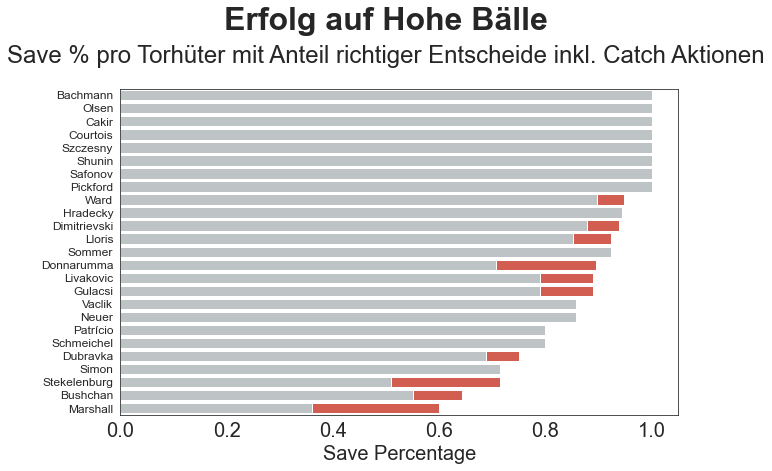

In [90]:
gk_hoherball = df[['spielcode', 'goalkeeper', 'spielsituation', 'verhalten', 'outcome', 'ist_tor', 'korrektes_verhalten']]
gk_hoherball = gk_hoherball[gk_hoherball.spielsituation == 'hoher_ball']
gk_hoherball['outcome'] = gk_hoherball.outcome.apply(lambda x: x if x == 'kein_tor_gehalten' else x if x == 'tor_erhalten' else np.nan)
gk_hoherball.dropna(subset=['outcome'], inplace=True)
group_saves_hb = gk_hoherball.groupby(['goalkeeper', 'outcome', 'korrektes_verhalten']).agg({'outcome': 'count'}).rename(columns={'outcome': 'anzahl_aktionen'}).reset_index()
pivot_save_hb = group_saves_hb.pivot(index='goalkeeper', columns=['outcome', 'korrektes_verhalten'], values='anzahl_aktionen').reset_index()
pivot_save_hb = pivot_save_hb.fillna(0)
pivot_save_hb['save_perc'] = (pivot_save_hb.iloc[:, [1, 4]].sum(axis=1) / pivot_save_hb.iloc[:, 1:5].sum(axis=1)) 
pivot_save_hb['korr_verhalten_perc'] = (pivot_save_hb.iloc[:, 1:3].sum(axis=1) / pivot_save_hb.iloc[:, 1:5].sum(axis=1)) * pivot_save_hb.save_perc
#pivot_save_hb.drop(pivot_save_hb.columns[1:5], axis=1, inplace=True)

fig = plt.figure(figsize=(10,6))

s1 = sns.barplot(x='save_perc', y='goalkeeper', data=pivot_save_hb, orient='h', color='#E74C3C', order=pivot_save_hb.sort_values('save_perc', ascending=False).goalkeeper)
s2 = sns.barplot(x='korr_verhalten_perc', y='goalkeeper', data=pivot_save_hb, orient='h', color='#BDC3C7', order=pivot_save_hb.sort_values('save_perc', ascending=False).goalkeeper)

plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel('Save Percentage', fontsize=20)
plt.ylabel(' ')
plt.text(0.5, -5, 'Erfolg auf Hohe Bälle', ha='center', fontsize=32, fontweight='bold')
plt.text(0.5, -2.5, 'Save % pro Torhüter mit Anteil richtiger Entscheide inkl. Catch Aktionen', ha='center', fontsize=24)

plt.savefig('erfolg_hohe_bälle_pro_th.png', bbox_inches='tight')
plt.show()